# **1. Import Library**

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# **2. Memuat Dataset dari Hasil Clustering**

In [117]:
# Sumber data = https://www.kaggle.com/competitions/tfug-mysuru-spaceship-titanic/data
df = pd.read_csv("data/spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [118]:
print("\nDataset Information :")
df.info()


Dataset Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


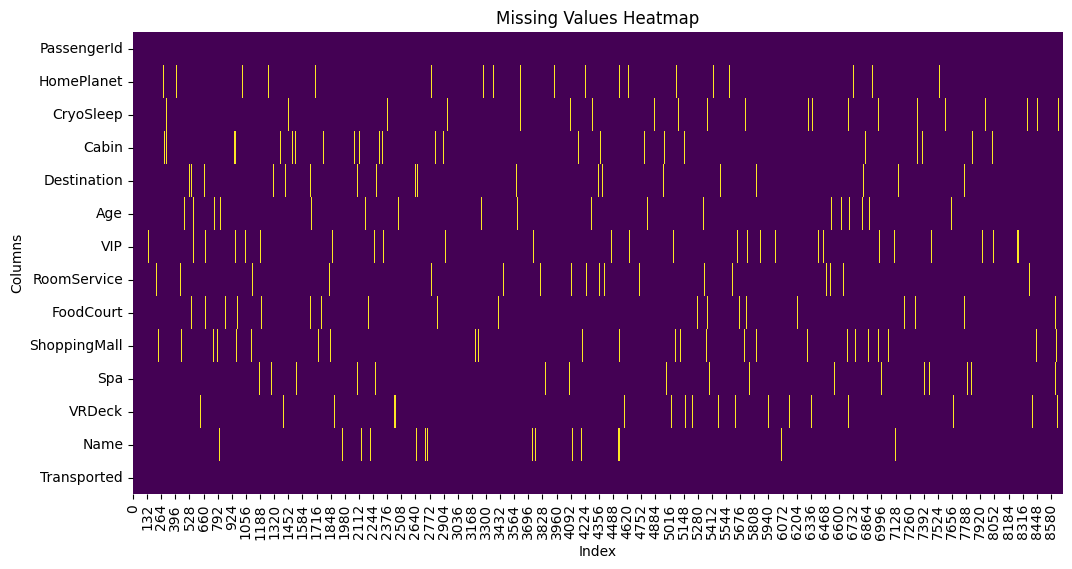

In [119]:
# Cek data yang hilang
df_transposed = df.T

plt.figure(figsize=(12, 6))  
sns.heatmap(df_transposed.isnull(), cbar=False, cmap='viridis')  
plt.title("Missing Values Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

In [120]:
# Isi data yang kosong dengan nilai yang paling banyak muncul
for column in df.columns:
    most_frequent_value = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent_value).infer_objects(copy=False)

C:\Users\windows\AppData\Local\Temp\ipykernel_18300\3578716597.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(most_frequent_value).infer_objects(copy=False)


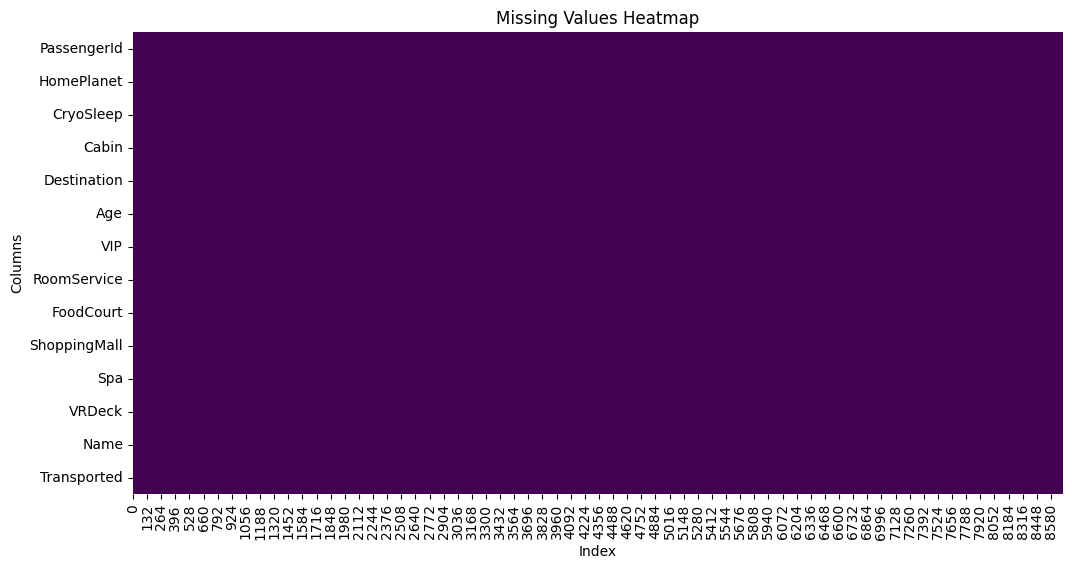

In [121]:
# Jika tidak ada warna kuning lagi maka data sudah terisi semuanya
df_transposed = df.T

plt.figure(figsize=(12, 6))  
sns.heatmap(df_transposed.isnull(), cbar=False, cmap='viridis')  
plt.title("Missing Values Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

In [122]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [123]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [124]:
# Drop kolom yang tidak digunakan
df.drop(columns=["PassengerId", "Name"], inplace=True)

In [125]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [126]:
k = df.select_dtypes(include=['bool'])

# Convert bool to INT
df[k.columns] = k.astype(int)

In [127]:
X = df.drop(columns="Transported")
y = df["Transported"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6954, 11), (1739, 11), (6954,), (1739,))

In [10]:
df.select_dtypes(include=['object']).columns

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')

In [101]:
numerical_cols = df.select_dtypes(include=["number"])
numerical_cols

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [102]:
# Remove Outliers Train_df
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

condition = ~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition]
df.shape[0]

3608

In [12]:
df.select_dtypes(include=["int", "float"]).columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [128]:
# Dalam preprocessor gunakan robust agar tahan dengan outliers
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
    ('categoric', cat_pipe(encoder="onehot"), ['HomePlanet', 'Cabin', 'Destination']),
])

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [133]:
pred_KNN = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(n_neighbors=3))
])

pred_KNN.fit(X_train, y_train)

print(pred_KNN.score(X_train, y_train),  pred_KNN.score(X_val, y_val))

0.8605119355766465 0.7481311098332375


In [137]:
pred_XGB = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier(objective='binary:logistic'))
])

pred_XGB.fit(X_train, y_train)

print(pred_XGB.score(X_train, y_train),  pred_XGB.score(X_val, y_val))

0.8852459016393442 0.78953421506613


In [138]:
pred_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(random_state=42))
])

pred_RF.fit(X_train, y_train)

print(pred_RF.score(X_train, y_train),  pred_RF.score(X_val, y_val))

0.9992809893586425 0.7837837837837838


Disini saya menggunakan Algoritma RandomForestClassifier karena Random Forest merupakan algoritma yang cukup cepat dalam optimalisasi waktu serta komputasi yang tidak berat, dan mendapatkan hasil yang maksimal

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [139]:
y_val_pred_KNN = pred_KNN.predict(X_val)
report_KNN = classification_report(y_val, y_val_pred_KNN)
print("Classification Report KNN Prediction :")
print(report_KNN)

cm_KNN = confusion_matrix(y_val, y_val_pred_KNN)
print("\nConfusion Matrix:")
print(cm_KNN)
print(f"Precision: {precision_score(y_val, y_val_pred_KNN, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_KNN ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_KNN , zero_division=0):.4f}")

Classification Report KNN Prediction :
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       863
           1       0.76      0.74      0.75       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739


Confusion Matrix:
[[654 209]
 [229 647]]
Precision: 0.7558
Recall: 0.7386
F1-Score: 0.7471


In [140]:
y_val_pred_XGB = pred_XGB.predict(X_val)
report_XGB = classification_report(y_val, y_val_pred_XGB)
print("Classification Report XGB Prediction :")
print(report_XGB)

cm_XGB = confusion_matrix(y_val, y_val_pred_XGB)
print("\nConfusion Matrix:")
print(cm_XGB)
print(f"Precision: {precision_score(y_val, y_val_pred_XGB, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_XGB ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_XGB , zero_division=0):.4f}")

Classification Report XGB Prediction :
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       863
           1       0.79      0.80      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Confusion Matrix:
[[673 190]
 [176 700]]
Precision: 0.7865
Recall: 0.7991
F1-Score: 0.7928


In [141]:
y_val_pred_proba_RF = pred_RF.predict_proba(X_val)[:, 1]  
y_val_pred_RF = (y_val_pred_proba_RF >= 0.5).astype(int)

report_RF= classification_report(y_val, y_val_pred_RF)
print("Classification Report Random Forest Prediction :")
print(report_RF)

cm_RF = confusion_matrix(y_val, y_val_pred_RF)
print("\nConfusion Matrix:")
print(cm_RF)
print(f"Precision: {precision_score(y_val, y_val_pred_RF, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_RF ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_RF , zero_division=0):.4f}")

Classification Report Random Forest Prediction :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       863
           1       0.80      0.77      0.78       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Confusion Matrix:
[[695 168]
 [204 672]]
Precision: 0.8000
Recall: 0.7671
F1-Score: 0.7832


1. **Akurasi**:
   - **KNN**: 75%
   - **XGBoost**: 79%
   - **Random Forest**: 79%
   - **XGBoost** dan **Random Forest** memiliki akurasi yang lebih tinggi dibandingkan **KNN**.

2. **Keseimbangan Precision dan Recall**:
   - **KNN**:
     - Precision: 0.74-0.76
     - Recall: 0.74-0.76
     - F1-Score: 0.75-0.75
   - **XGBoost**:
     - Precision: 0.79-0.79
     - Recall: 0.78-0.80
     - F1-Score: 0.79-0.79
   - **Random Forest**:
     - Precision: 0.77-0.80
     - Recall: 0.77-0.81
     - F1-Score: 0.78-0.79
   - **XGBoost** dan **Random Forest** memiliki precision, recall, dan F1-Score yang lebih seimbang dan lebih tinggi dibandingkan **KNN**.

3. **Confusion Matrix**:
   - **KNN**:
     - False Positive: 209
     - False Negative: 229
   - **XGBoost**:
     - False Positive: 190
     - False Negative: 176
   - **Random Forest**:
     - False Positive: 168
     - False Negative: 204
   - **XGBoost** memiliki lebih sedikit kesalahan (false positive dan false negative) dibandingkan **KNN** dan **Random Forest**.

4. **Kesimpulan**:
   - **XGBoost** dan **Random Forest** menunjukkan performa yang lebih baik secara keseluruhan dibandingkan **KNN**.
   - Jika Anda memilih antara ketiga model, **XGBoost** adalah pilihan yang lebih baik berdasarkan metrik evaluasi yang ada, karena memiliki akurasi yang sama dengan **Random Forest** tetapi dengan kesalahan yang lebih sedikit.

5. **Kelebihan dan Kekurangan**:
   - **KNN**:
     - **Kelebihan**:
       - Mudah diimplementasikan dan dipahami.
       - Tidak memerlukan pelatihan (lazy learning), sehingga cepat untuk dataset kecil.
     - **Kekurangan**:
       - Sensitif terhadap data yang tidak relevan atau redundan.
       - Performa menurun pada dataset besar karena kompleksitas komputasi yang tinggi.
       - Membutuhkan normalisasi atau scaling data untuk hasil yang optimal.

   - **XGBoost**:
     - **Kelebihan**:
       - Performa yang sangat baik pada dataset besar dan kecil.
       - Dapat menangani data dengan fitur yang tidak relevan atau redundan.
       - Mendukung regularisasi untuk mengurangi overfitting.
     - **Kekurangan**:
       - Lebih kompleks dan membutuhkan waktu pelatihan yang lebih lama dibandingkan KNN.
       - Membutuhkan tuning hyperparameter untuk hasil yang optimal.

   - **Random Forest**:
     - **Kelebihan**:
       - Lebih robust terhadap overfitting dibandingkan KNN.
       - Dapat menangani data dengan fitur yang tidak relevan atau redundan.
       - Performa umumnya lebih baik pada dataset besar.
     - **Kekurangan**:
       - Lebih kompleks dan membutuhkan waktu pelatihan yang lebih lama dibandingkan KNN.
       - Kurang interpretable karena terdiri dari banyak pohon keputusan.

6. **Rekomendasi**:
   - Jika Anda memprioritaskan akurasi dan performa, **XGBoost** adalah pilihan yang lebih baik.
   - Jika Anda membutuhkan model yang sederhana dan cepat untuk dataset kecil, **KNN** bisa menjadi pilihan.
   - Untuk meningkatkan performa lebih lanjut, Anda dapat:
     - Mengeksplorasi hyperparameter lain atau algoritma lain.
     - Menambah jumlah data pelatihan, terutama jika dataset kecil.
     - Menerapkan teknik handling class imbalance (jika ada ketidakseimbangan kelas).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Tunning dengan Hyperparameter : RandomizedSearchCV

In [145]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(metric="manhattan"))
])

model_knn_tunning_random = RandomizedSearchCV(pipeline, rsp.knn_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_knn_tunning_random.fit(X_train, y_train)

print(model_knn_tunning_random.best_params_)
print(model_knn_tunning_random.score(X_train, y_train), model_knn_tunning_random.best_score_, model_knn_tunning_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_neighbors': 32, 'algo__p': 1.6501836795962914, 'algo__weights': 'uniform'}
0.8025596778832327 0.7960894548200405 0.7906843013225991


In [143]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier(objective='binary:logistic'))
])

model_xgb_tunning_random = RandomizedSearchCV(pipeline, rsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_xgb_tunning_random.fit(X_train, y_train)

print(model_xgb_tunning_random.best_params_)
print(model_xgb_tunning_random.score(X_train, y_train), model_xgb_tunning_random.best_score_, model_xgb_tunning_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__colsample_bytree': 0.5042618967434116, 'algo__gamma': 7, 'algo__learning_rate': 0.24821773522540128, 'algo__max_depth': 7, 'algo__n_estimators': 166, 'algo__reg_alpha': 0.007085399812338734, 'algo__reg_lambda': 0.0018175602641608273, 'algo__subsample': 0.6944726821612407}
0.8065861374748347 0.7936453770125524 0.7935595169637722


In [147]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_tunning_random = RandomizedSearchCV(pipeline, rsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_tunning_random.fit(X_train, y_train)

print(model_rf_tunning_random.best_params_)
print(model_rf_tunning_random.score(X_train, y_train), model_rf_tunning_random.best_score_, model_rf_tunning_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 61, 'algo__max_features': 0.6762208932300875, 'algo__min_samples_leaf': 11, 'algo__n_estimators': 187}
0.8280126545872879 0.7986784519185515 0.7998849913743531


Tunning dengan Hyperparameter : Bayesian Optimizer

In [29]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_tunning_bayes = BayesSearchCV(pipeline, bsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_tunning_bayes.fit(X_train, y_train)

print(model_rf_tunning_bayes.best_params_)
print(model_rf_tunning_bayes.score(X_train, y_train), model_rf_tunning_bayes.best_score_, model_rf_tunning_bayes.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [152]:
bsp.xgb_params = {
    'algo__n_estimators': [100, 200, 300],
    'algo__max_depth': [3, 5, 7],
    'algo__learning_rate': [0.01, 0.1, 0.2],
    'algo__subsample': [0.8, 0.9, 1.0],
    'algo__colsample_bytree': [0.8, 0.9, 1.0],
    'algo__gamma': [0, 0.1, 0.2],
}

In [153]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])

model_xgb_tunning_bayes = RandomizedSearchCV(pipeline, bsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_xgb_tunning_bayes.fit(X_train, y_train)

print(model_xgb_tunning_bayes.best_params_)
print(model_xgb_tunning_bayes.score(X_train, y_train), model_xgb_tunning_bayes.best_score_, model_xgb_tunning_bayes.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__subsample': 0.8, 'algo__n_estimators': 300, 'algo__max_depth': 7, 'algo__learning_rate': 0.01, 'algo__gamma': 0.1, 'algo__colsample_bytree': 1.0}
0.8288754673569169 0.7950832949743727 0.8021851638872916


In [155]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(metric="manhattan"))
])

model_KNN_tunning_bayes = BayesSearchCV(pipeline, bsp.knn_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_KNN_tunning_bayes .fit(X_train, y_train)

print(model_KNN_tunning_bayes .best_params_)
print(model_KNN_tunning_bayes .score(X_train, y_train), model_KNN_tunning_bayes .best_score_, model_KNN_tunning_bayes .score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Tunning : RandomizedSearchCV

In [146]:
best_model_KNN_tunning_random = model_knn_tunning_random.best_estimator_
y_val_pred_KNN_tunning_random = best_model_KNN_tunning_random.predict(X_val)
report_KNN_tunning_random = classification_report(y_val, y_val_pred_KNN_tunning_random)
print("Classification Report KNN Prediction :")
print(report_KNN_tunning_random)

cm_KNN_tunning_random = confusion_matrix(y_val, y_val_pred_KNN_tunning_random)
print("\nConfusion Matrix:")
print(cm_KNN_tunning_random)
print(f"Precision: {precision_score(y_val, y_val_pred_KNN_tunning_random, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_KNN_tunning_random ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_KNN_tunning_random , zero_division=0):.4f}")

Classification Report KNN Prediction :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       863
           1       0.77      0.82      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Confusion Matrix:
[[653 210]
 [154 722]]
Precision: 0.7747
Recall: 0.8242
F1-Score: 0.7987


In [144]:
best_model_xgb_tunning_random = model_xgb_tunning_random.best_estimator_
y_val_pred_xgb_tunning_random = best_model_xgb_tunning_random.predict(X_val)
report_xgb_tunning_random = classification_report(y_val, y_val_pred_xgb_tunning_random)
print("Classification Report xgb Prediction :")
print(report_xgb_tunning_random)

cm_xgb_tunning_random = confusion_matrix(y_val, y_val_pred_xgb_tunning_random)
print("\nConfusion Matrix:")
print(cm_xgb_tunning_random)
print(f"Precision: {precision_score(y_val, y_val_pred_xgb_tunning_random, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_xgb_tunning_random ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_xgb_tunning_random , zero_division=0):.4f}")

Classification Report xgb Prediction :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       863
           1       0.78      0.83      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Confusion Matrix:
[[655 208]
 [151 725]]
Precision: 0.7771
Recall: 0.8276
F1-Score: 0.8015


In [157]:
best_model_RF_tunning_random = model_rf_tunning_random.best_estimator_
y_val_pred_RF_tunning_random = best_model_RF_tunning_random.predict(X_val)
report_RF_tunning_random     = classification_report(y_val, y_val_pred_RF_tunning_random )
print("Classification Report RF Prediction :")
print(report_RF_tunning_random)

cm_RF_tunning_random         = confusion_matrix(y_val, y_val_pred_RF_tunning_random )
print("\nConfusion Matrix:")
print(cm_RF_tunning)
print(f"Precision: {precision_score(y_val, y_val_pred_RF_tunning_random , zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_RF_tunning_random  ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_RF_tunning_random  , zero_division=0):.4f}")

Classification Report RF Prediction :
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


Confusion Matrix:
[[676 187]
 [161 715]]
Precision: 0.7927
Recall: 0.8162
F1-Score: 0.8043


Tunning : BayesSearchCV (Bayesian Optimizer)

In [158]:
best_model_RF_tunning_bayes = model_rf_tunning_bayes.best_estimator_
y_val_pred_RF_tunning_bayes = best_model_RF_tunning_bayes.predict(X_val)
report_RF_tunning_bayes     = classification_report(y_val, y_val_pred_RF_tunning_bayes)
print("Classification Report RF Prediction :")
print(report_RF_tunning_bayes)

cm_RF_tunning_bayes         = confusion_matrix(y_val, y_val_pred_RF_tunning_bayes)
print("\nConfusion Matrix:")
print(cm_RF_tunning_bayes)
print(f"Precision: {precision_score(y_val, y_val_pred_RF_tunning_bayes, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_RF_tunning_bayes ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_RF_tunning_bayes, zero_division=0):.4f}")

Classification Report RF Prediction :
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       863
           1       0.79      0.81      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


Confusion Matrix:
[[675 188]
 [163 713]]
Precision: 0.7913
Recall: 0.8139
F1-Score: 0.8025


In [154]:
best_model_xgb_tunning_bayes = model_xgb_tunning_bayes.best_estimator_
y_val_pred_xgb_tunning_bayes = best_model_xgb_tunning_bayes.predict(X_val)
report_xgb_tunning_bayes = classification_report(y_val, y_val_pred_xgb_tunning_bayes)
print("Classification Report xgb Prediction :")
print(report_xgb_tunning_bayes)

cm_xgb_tunning_bayes = confusion_matrix(y_val, y_val_pred_xgb_tunning_bayes)
print("\nConfusion Matrix:")
print(cm_xgb_tunning_bayes)
print(f"Precision: {precision_score(y_val, y_val_pred_xgb_tunning_bayes, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_xgb_tunning_bayes ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_xgb_tunning_bayes , zero_division=0):.4f}")

Classification Report xgb Prediction :
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       863
           1       0.79      0.82      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


Confusion Matrix:
[[678 185]
 [159 717]]
Precision: 0.7949
Recall: 0.8185
F1-Score: 0.8065


In [156]:
best_model_KNN_tunning_bayes = model_KNN_tunning_bayes.best_estimator_
y_val_pred_KNN_tunning_bayes = best_model_KNN_tunning_bayes.predict(X_val)
report_KNN_tunning_bayes     = classification_report(y_val, y_val_pred_KNN_tunning_bayes)
print("Classification Report KNN Prediction :")
print(report_KNN_tunning_bayes)

cm_KNN_tunning_bayes         = confusion_matrix(y_val, y_val_pred_KNN_tunning_bayes)
print("\nConfusion Matrix:")
print(cm_KNN_tunning_bayes)
print(f"Precision: {precision_score(y_val, y_val_pred_KNN_tunning_bayes, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_KNN_tunning_bayes ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_KNN_tunning_bayes, zero_division=0):.4f}")

Classification Report KNN Prediction :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       863
           1       0.77      0.82      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Confusion Matrix:
[[653 210]
 [154 722]]
Precision: 0.7747
Recall: 0.8242
F1-Score: 0.7987


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Sebelum Tuning:**
- **KNN:**
  - Akurasi: 0.79
  - Precision (Kelas 1.0): 0.77
  - Recall (Kelas 1.0): 0.82
  - F1-Score (Kelas 1.0): 0.80

- **XGBoost:**
  - Akurasi: 0.80
  - Precision (Kelas 1.0): 0.79
  - Recall (Kelas 1.0): 0.82
  - F1-Score (Kelas 1.0): 0.80

- **Random Forest:**
  - Akurasi: 0.80
  - Precision (Kelas 1.0): 0.79
  - Recall (Kelas 1.0): 0.82
  - F1-Score (Kelas 1.0): 0.80

**Setelah Tuning (Bayesian):**
- **KNN:**
  - Akurasi: 0.79
  - Precision (Kelas 1.0): 0.77
  - Recall (Kelas 1.0): 0.82
  - F1-Score (Kelas 1.0): 0.80

- **XGBoost:**
  - Akurasi: 0.80
  - Precision (Kelas 1.0): 0.79
  - Recall (Kelas 1.0): 0.82
  - F1-Score (Kelas 1.0): 0.81

- **Random Forest:**
  - Akurasi: 0.80
  - Precision (Kelas 1.0): 0.79
  - Recall (Kelas 1.0): 0.81
  - F1-Score (Kelas 1.0): 0.80

**Kesimpulan:**
- Performa model **tidak mengalami perubahan signifikan** setelah tuning.
  - Akurasi, Precision, Recall, dan F1-Score untuk semua model (KNN, XGBoost, Random Forest) tetap stabil.
  - XGBoost menunjukkan sedikit peningkatan pada F1-Score (dari 0.80 menjadi 0.81) setelah tuning.
  - Hal ini menunjukkan bahwa hyperparameter tuning yang dilakukan mungkin sudah mendekati optimal atau perlu dievaluasi kembali dengan metode tuning yang lebih canggih.

**Kelemahan Model:**
1. **Precision dan Recall yang Seimbang Tetapi Tidak Tinggi:**
   - Meskipun Precision dan Recall seimbang (sekitar 0.79-0.82), nilai ini masih tergolong sedang. Model mungkin masih memiliki ruang untuk meningkatkan performa.

2. **KNN Memiliki Performa yang Lebih Rendah:**
   - KNN memiliki akurasi dan F1-Score yang sedikit lebih rendah (0.79) dibandingkan XGBoost dan Random Forest (0.80). Ini menunjukkan bahwa KNN mungkin kurang cocok untuk dataset ini.

3. **Potensi Overfitting atau Underfitting:**
   - Jika akurasi pada data pelatihan jauh lebih tinggi daripada data validasi, model mungkin overfitting.
   - Jika akurasi pada data pelatihan dan validasi rendah, model mungkin underfitting.
   - Perlu dicek perbedaan akurasi antara data pelatihan dan validasi untuk memastikan apakah model overfitting atau underfitting.

4. **Tidak Ada Peningkatan Signifikan Setelah Tuning:**
   - Hasil tuning tidak memberikan peningkatan yang signifikan, menunjukkan bahwa hyperparameter yang digunakan mungkin sudah mendekati optimal atau perlu dievaluasi kembali.

**Rekomendasi Tindakan Lanjutan:**
1. **Evaluasi Hyperparameter Tuning:**
   - Periksa kembali hyperparameter yang digunakan dalam tuning. Mungkin perlu mencoba kombinasi hyperparameter yang berbeda atau menggunakan metode tuning lain seperti GridSearchCV.

2. **Mengumpulkan Data Tambahan:**
   - Jika dataset kecil, pertimbangkan untuk mengumpulkan lebih banyak data, terutama untuk kelas minoritas (jika ada ketidakseimbangan kelas).

3. **Mencoba Algoritma Lain:**
   - Jika hasil belum memuaskan, coba algoritma lain seperti LightGBM, CatBoost, atau Support Vector Machine (SVM).

4. **Mengatasi Overfitting/Underfitting:**
   - Jika model overfitting, pertimbangkan untuk:
     - Mengurangi kompleksitas model (misalnya, mengurangi depth pada RandomForest atau XGBoost).
     - Menerapkan teknik regularisasi.
   - Jika model underfitting, pertimbangkan untuk:
     - Meningkatkan kompleksitas model (misalnya, menambah depth pada RandomForest atau XGBoost).
     - Menambah fitur atau menggunakan teknik feature engineering.

5. **Menggunakan Teknik Handling Class Imbalance:**
   - Jika ada ketidakseimbangan kelas, pertimbangkan untuk menggunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) atau undersampling.

6. **Fokus pada XGBoost:**
   - XGBoost menunjukkan performa terbaik setelah tuning (F1-Score 0.81). Fokuskan upaya tuning dan optimasi pada model ini untuk hasil yang lebih baik.